In [1]:
install.packages(c("tidyverse", "randomForest", "ggplot2"), repos="https://cloud.r-project.org")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(randomForest)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
walmart <- read.csv("Walmart.csv")


In [4]:
lm_model <- lm(Weekly_Sales ~ Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment, data=walmart)
cat("===== Linear Regression Summary =====\n")
print(summary(lm_model))

===== Linear Regression Summary =====

Call:
lm(formula = Weekly_Sales ~ Holiday_Flag + Temperature + Fuel_Price + 
    CPI + Unemployment, data = walmart)

Residuals:
     Min       1Q   Median       3Q      Max 
-1027998  -492904  -113110   410799  2781598 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1980045.2    83335.4  23.760   <2e-16 ***
Holiday_Flag   76738.9    28290.9   2.712   0.0067 ** 
Temperature     -737.6      408.7  -1.804   0.0712 .  
Fuel_Price    -24211.6    16090.4  -1.505   0.1324    
CPI            -2207.9      202.4 -10.907   <2e-16 ***
Unemployment  -50584.4     4086.6 -12.378   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 554400 on 6068 degrees of freedom
Multiple R-squared:  0.03801,	Adjusted R-squared:  0.03722 
F-statistic: 47.95 on 5 and 6068 DF,  p-value: < 2.2e-16



In [5]:
walmart$pred_lm <- predict(lm_model, walmart)


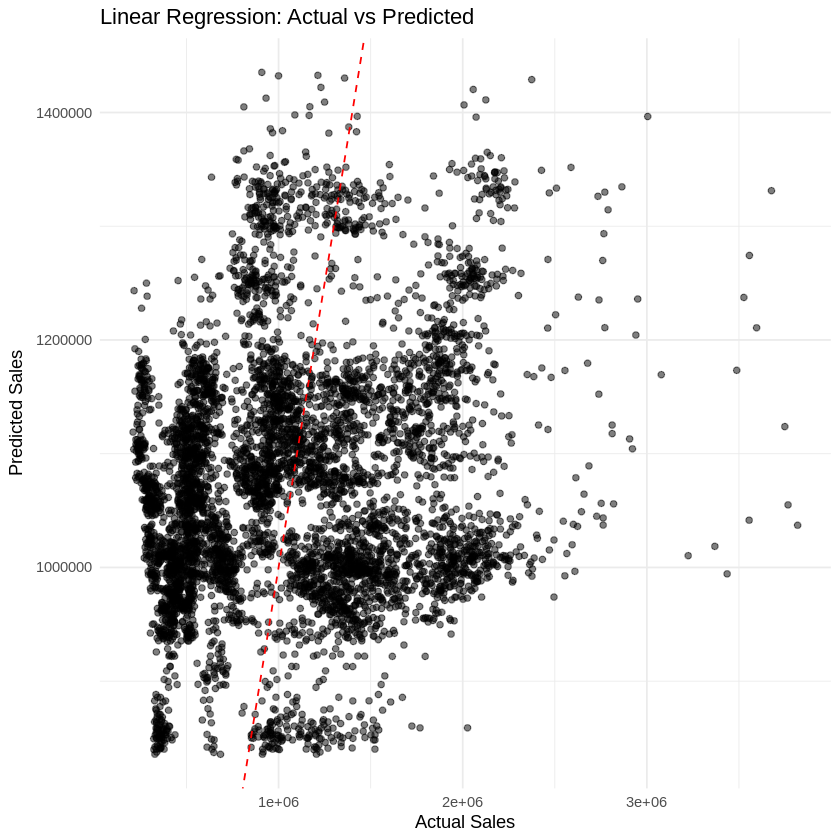

In [6]:
ggplot(walmart, aes(x=Weekly_Sales, y=pred_lm)) +
  geom_point(alpha=0.5) +
  geom_abline(slope=1, intercept=0, color="red", linetype="dashed") +
  labs(x="Actual Sales", y="Predicted Sales", title="Linear Regression: Actual vs Predicted") +
  theme_minimal()


===== Random Forest Feature Importance =====
               %IncMSE IncNodePurity
Holiday_Flag -8.603894  6.284782e+12
Temperature  26.661751  9.297919e+13
Fuel_Price   26.281134  7.486699e+13
CPI          31.485258  1.597631e+14
Unemployment 35.455694  1.847713e+14


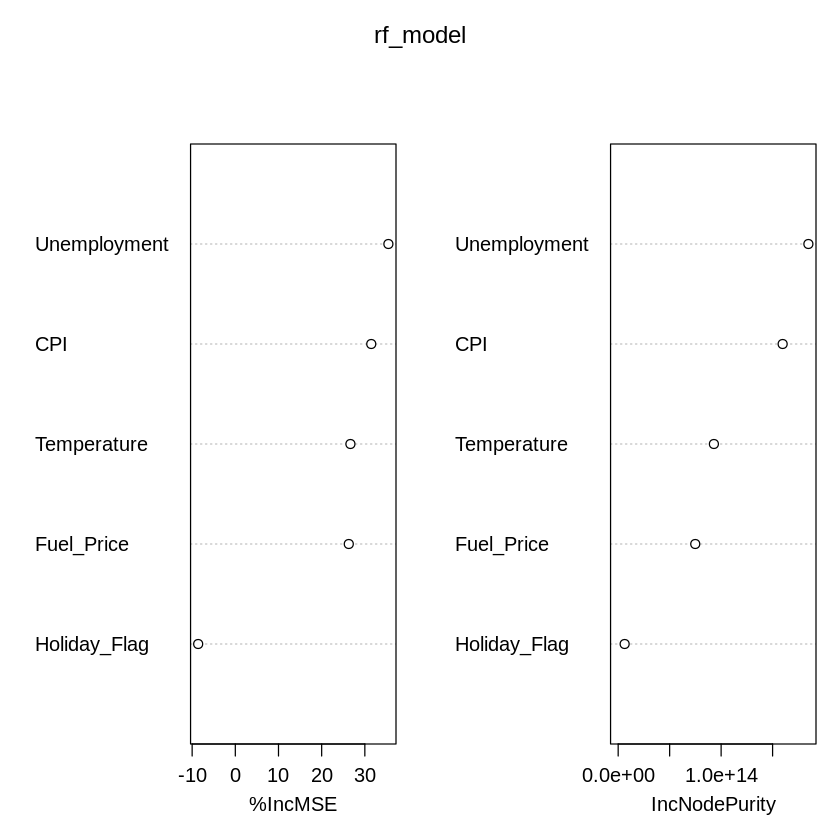

In [7]:
set.seed(123)
rf_model <- randomForest(Weekly_Sales ~ Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment,
                         data=walmart, ntree=500, importance=TRUE)

cat("\n===== Random Forest Feature Importance =====\n")
print(importance(rf_model))
varImpPlot(rf_model)

In [8]:
walmart$pred_rf <- predict(rf_model, walmart)

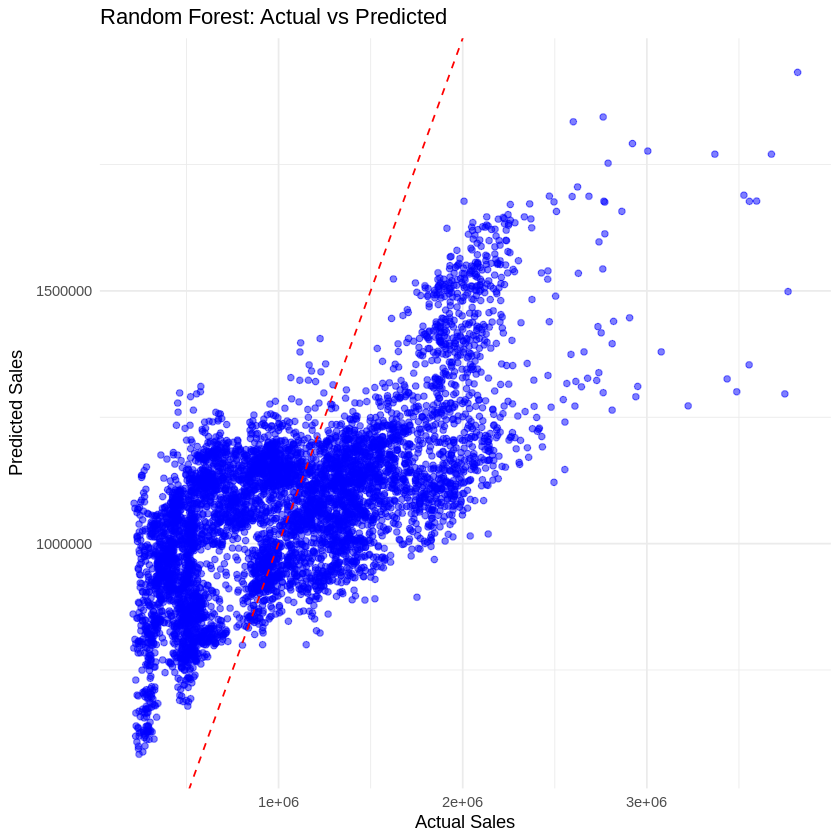

In [9]:
ggplot(walmart, aes(x=Weekly_Sales, y=pred_rf)) +
  geom_point(alpha=0.5, color="blue") +
  geom_abline(slope=1, intercept=0, color="red", linetype="dashed") +
  labs(x="Actual Sales", y="Predicted Sales", title="Random Forest: Actual vs Predicted") +
  theme_minimal()